# Coopis 2018 paper _Evaluating Multi-Tenant Live Migrations Effects on Performance_ article figures

Data files xp1.csv and xp3.csv can be downloaded from http://doi.org/10.5281/zenodo.1402632

In [1]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import glob

Replace path variable value with the paths of xp1.csv and xp3.csv

In [2]:
path = "~/migrations/"

## XP1 : migration duration

In [3]:
df_migr = pd.read_csv(path + "xp1.csv")
d = df_migr[["bpm", "nb","duration_total", "duration_move", "duration_enable", "duration_disable"]].melt(id_vars=['bpm','nb'], var_name='cols', value_name='duration')

/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


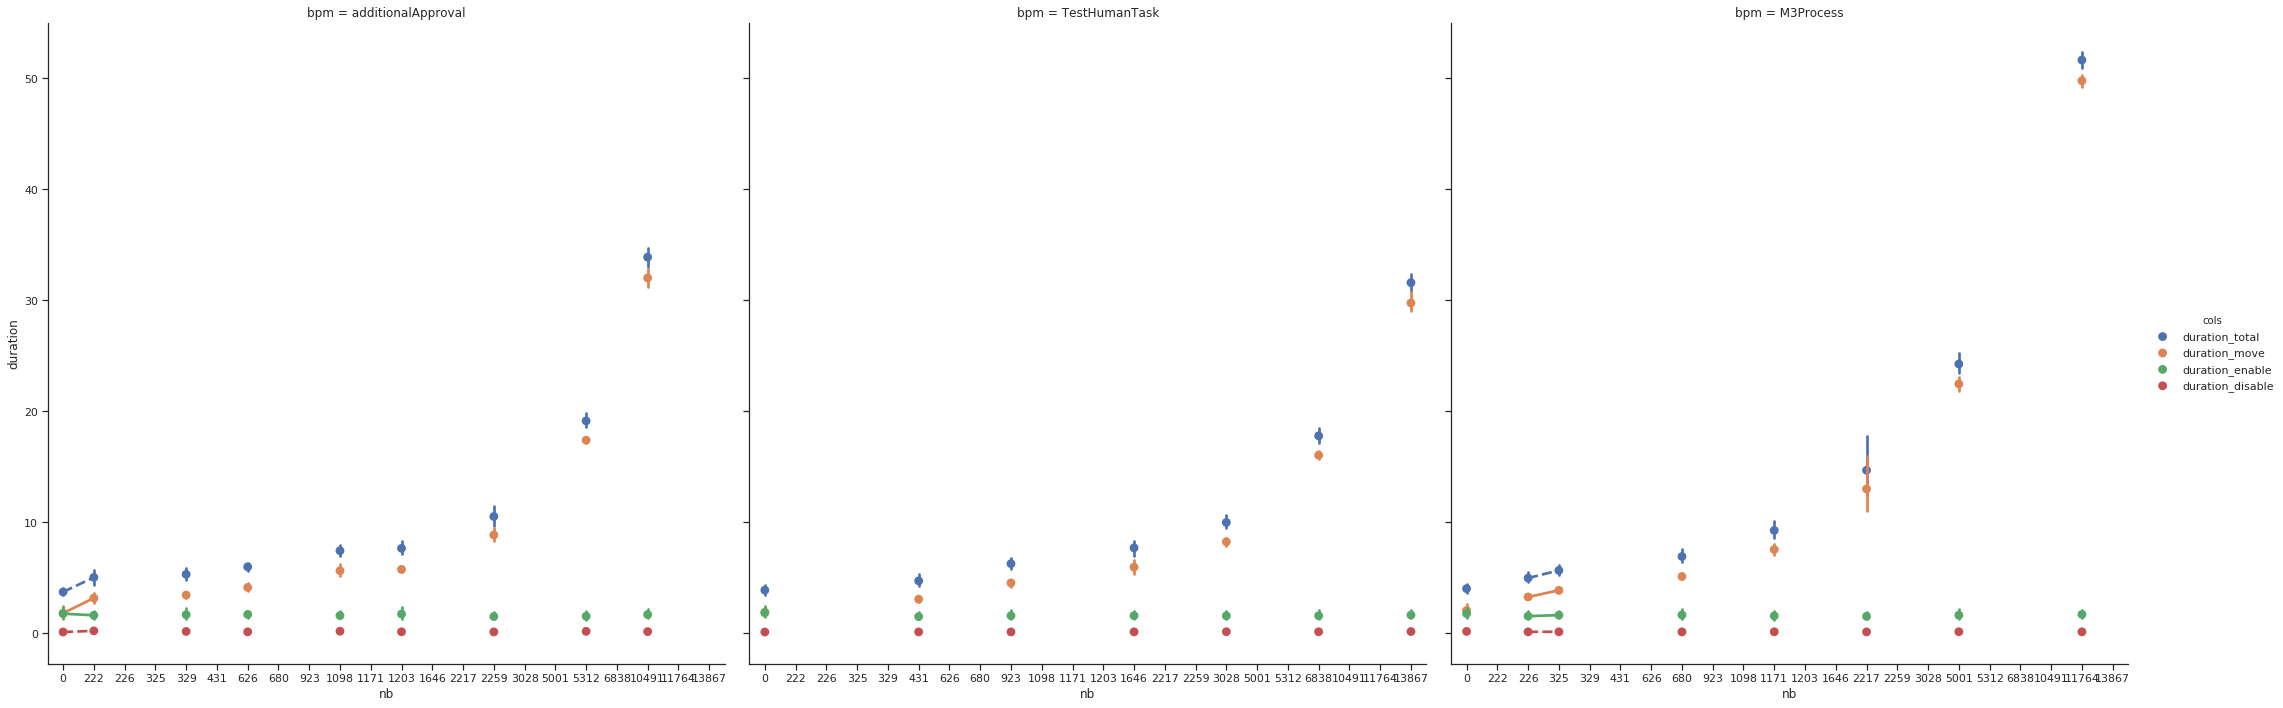

In [4]:
sns.set(style="ticks")
sns.factorplot(x="nb", y="duration", hue="cols", col="bpm", data=d,size=10, linestyles=["--", "-","-","--"])

/home/guillaume/soft/anaconda2/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


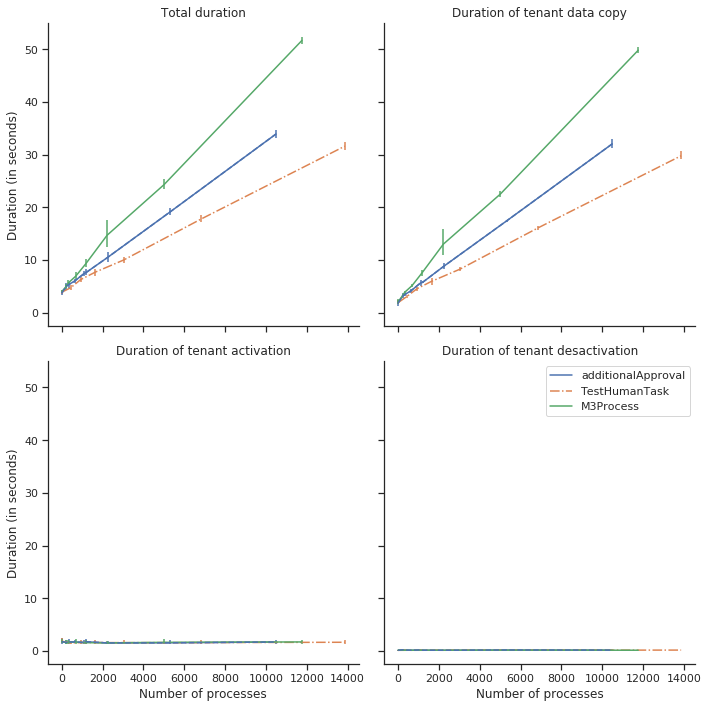

In [5]:
kws = {"ls" : ["-","--","."]}
g = sns.FacetGrid(d, col="cols", col_wrap=2,hue="bpm",size=5, legend_out=False,hue_kws={"ls" : ["-","--", "-."]})

g.map(sns.lineplot, "nb", "duration", err_style="bars") ;
axes = g.axes.flatten()
axes[0].set_title("Total duration")
axes[0].set_ylabel("Duration (in seconds)")
axes[0].lines[1].set_linestyle("--")
axes[0].lines[2].set_linestyle("-.")
axes[1].set_title("Duration of tenant data copy")
axes[1].lines[1].set_linestyle("--")
axes[1].lines[2].set_linestyle("-.")
axes[2].set_title("Duration of tenant activation")
axes[2].set_ylabel("Duration (in seconds)")
axes[2].set_xlabel("Number of processes")
axes[2].lines[1].set_linestyle("--")
axes[2].lines[2].set_linestyle("-.")
axes[3].set_title("Duration of tenant desactivation")
axes[3].lines[1].set_linestyle("--")
axes[3].lines[2].set_linestyle("-.")
axes[3].set_xlabel("Number of processes")
axes[3].legend()


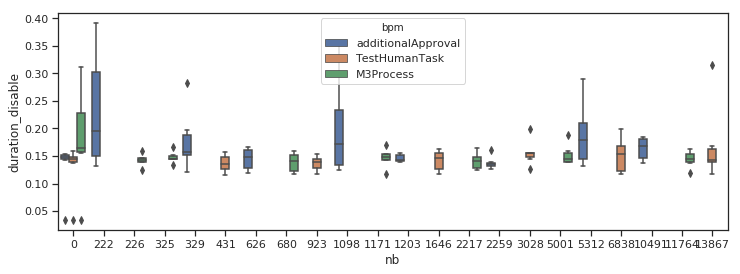

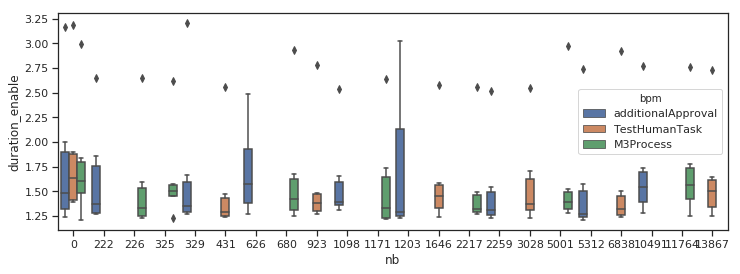

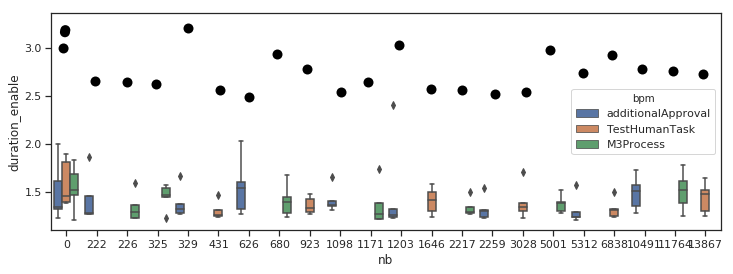

In [6]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_disable", hue="bpm", data=df_migr,ax=ax)
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr)
fig, ax = plt.subplots(figsize=(12,4))


#df[df["index_launch"]>0].boxplot(by="nb", column="duration_enable")
sns.boxplot(x="nb", y="duration_enable", hue="bpm", data=df_migr[df_migr["index_launch"]>0])
ini_df = df_migr[df_migr["index_launch"]==0]
x = ini_df["nb"]
y = ini_df["duration_enable"]

sns.stripplot(x="nb", y="duration_enable",data=ini_df,  size=10, color="black", edgecolor="gray")

Text(0.5,0,u'Order of the launch')

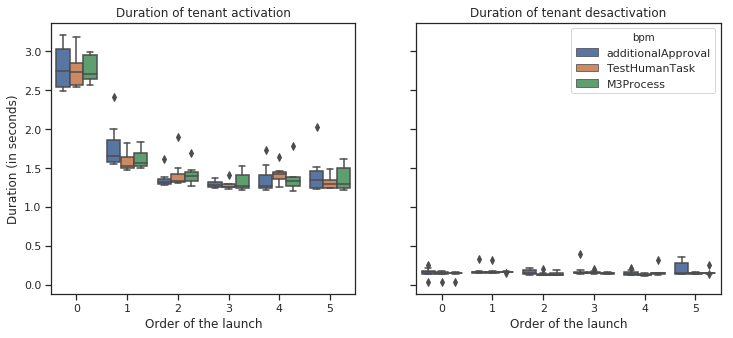

In [7]:
plt.rcParams['figure.figsize'] = (12,5)
fig, axes = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x="index_launch", y="duration_enable", hue="bpm", data=df_migr,ax=axes[0])
axes[0].set_title("Duration of tenant activation")
sns.boxplot(x="index_launch", y="duration_disable", hue="bpm", data=df_migr,ax=axes[1])
axes[1].set_title("Duration of tenant desactivation")
axes[0].legend().remove()
axes[0].set_ylabel("Duration (in seconds)")
axes[1].set_ylabel("")
axes[0].set_xlabel("Order of the launch")
axes[1].set_xlabel("Order of the launch")


## XP2 & XP3

In [8]:
all_data = pd.read_csv(path + "xp3.csv")
all_data_restrict = all_data.loc[
    ((all_data.relative_task_end < all_data.begin_migr) 
    & (all_data.relative_task_end> all_data.begin_migr-60000)
    & (all_data.tenant != "tenant2")) | (all_data.is_migration == True)]
all_data_restrict = all_data_restrict[all_data_restrict.nb.isin([25,50,100,200,0])]

## XP2

In [9]:
all_data_migrated_restricted = all_data[(all_data.tenant=="tenant2") & (all_data.duration< 200000) & (all_data.agentbpm_task_exec_restricted< 15000)
                                       &(all_data.nb.isin([25,50,100,200,0]))]
all_data_migrated_restricted.groupby(["bpm","type_y"])["duration"].describe()

count           mean           std  \
bpm                        type_y                                         
M3Process--1.0.bar         post    10292.0   38449.298581  16217.793217   
                           pre     14630.0   36950.857895  15909.099312   
TestHumanTask-1.0.bar      post    19529.0   12579.335091   9378.176864   
                           pre     19688.0   13892.846099  15594.283558   
additionalApproval-2.0.bar post    17710.0  113370.094128  42819.486590   
                           pre     25749.0  110685.854985  42710.761202   

                                       min      25%       50%       75%  \
bpm                        type_y                                         
M3Process--1.0.bar         post    13657.0  26046.0   34401.0   44808.0   
                           pre      4398.0  24837.0   33933.5   47169.0   
TestHumanTask-1.0.bar      post      581.0   3081.0    9588.0   15921.0   
                           pre       466.0   2969.5   12282.0   19553.5   
additionalApproval-2.0.bar post    22915.0  78601.0  116355.0  146674.0   
                           pre     12907.0  83799.0  114749.0  141261.0   

                                        max  
bpm                        type_y            
M3Process--1.0.bar         post     76321.0  
                           pre      87303.0  
TestHumanTask-1.0.bar      post     32269.0  
                           pre     168560.0  
additionalApproval-2.0.bar post    199938.0  
                           pre     199856.0

## XP3

### Migration vs no migration (all data)

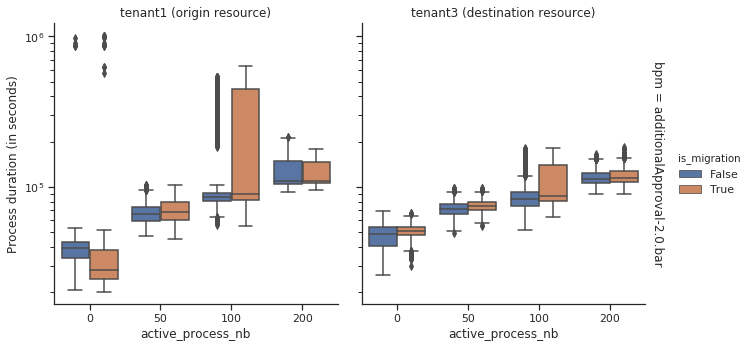

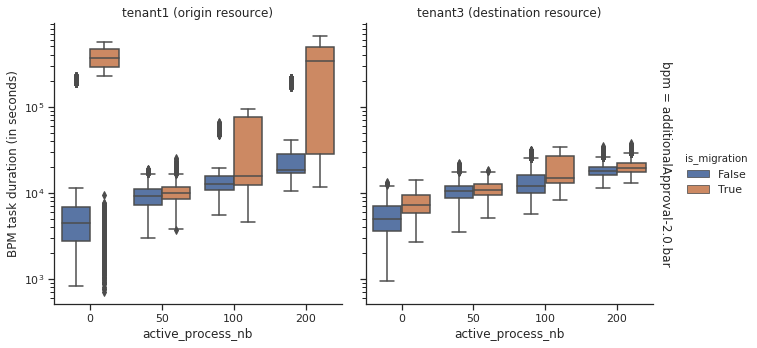

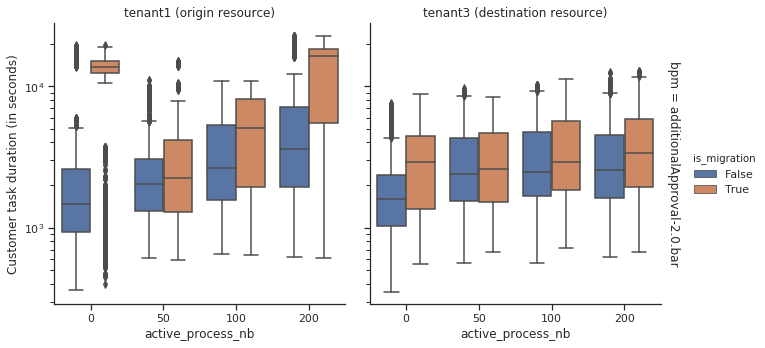

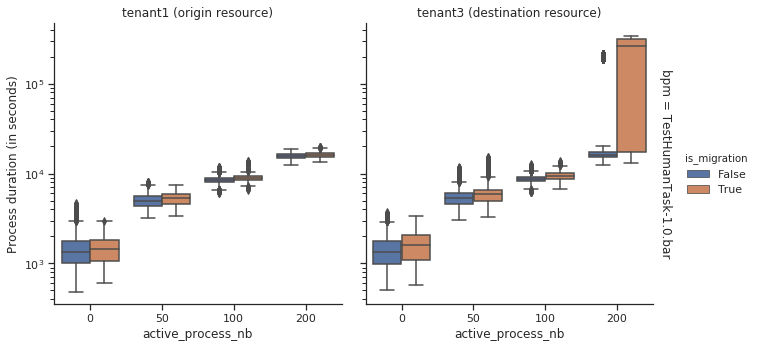

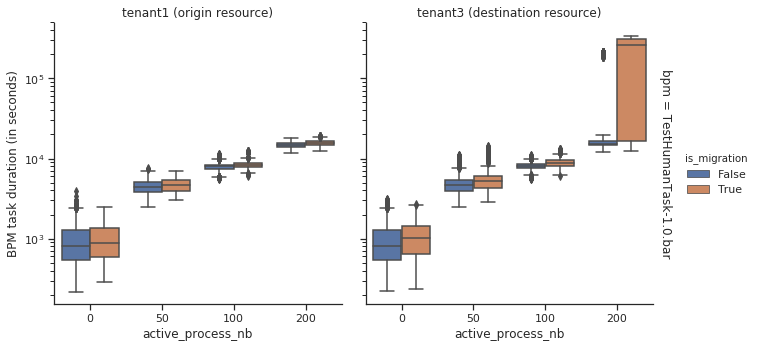

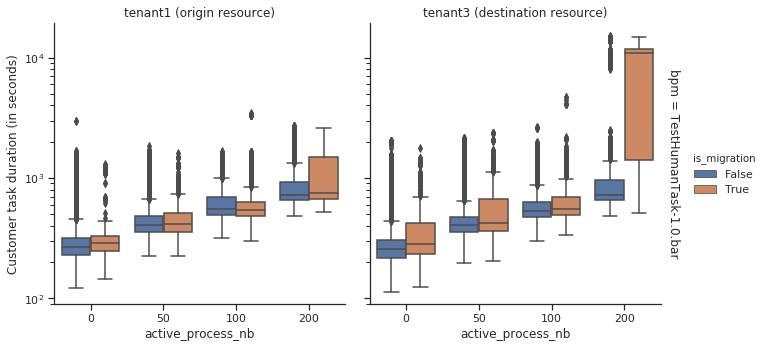

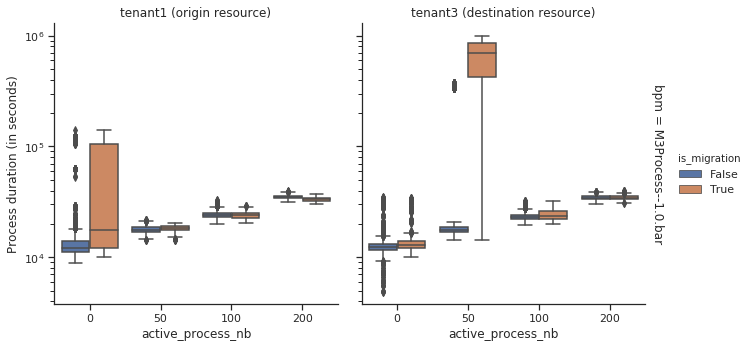

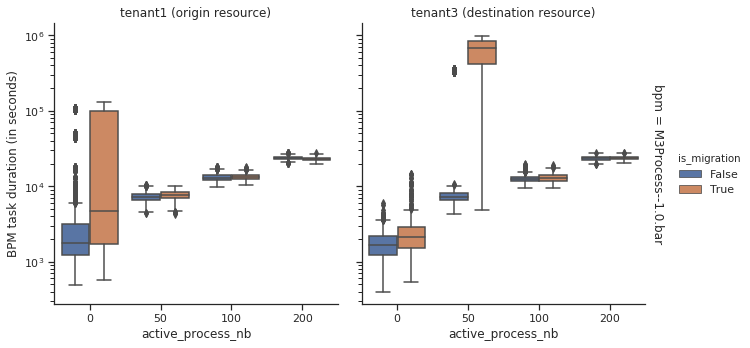

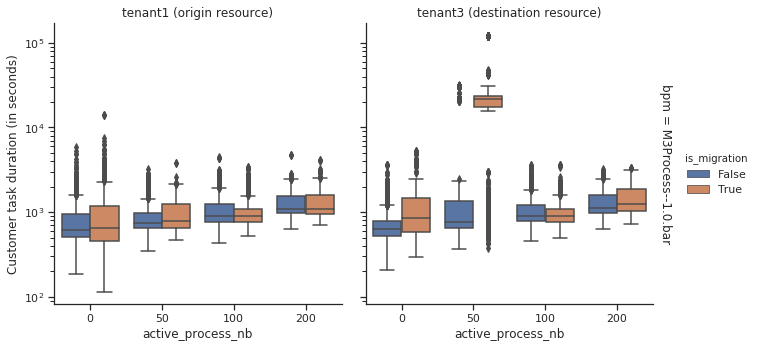

In [10]:
for bpm in all_data_restrict["bpm"].unique():
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True, size=5)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True, size=5)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("BPM task duration (in seconds)")
    #axes[2].set_ylabel("Duration (in seconds)")
    #xes[2].set_ylabel("Duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restrict[all_data_restrict["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Customer task duration (in seconds)")

### Migration vs no migration (restricted data : process duration < 200s & client task duration < 15s)

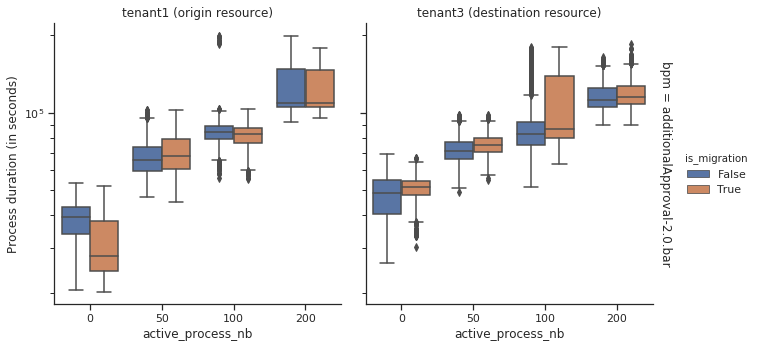

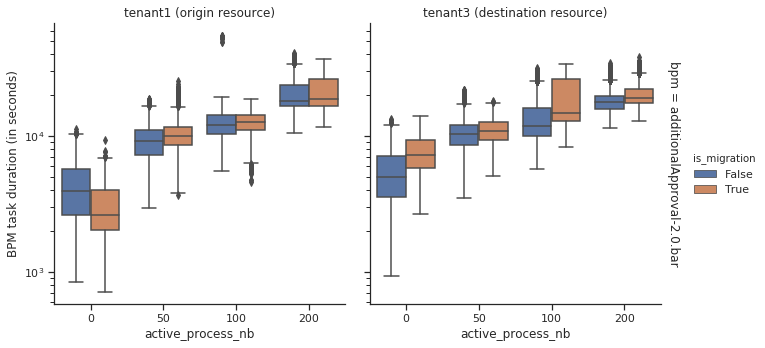

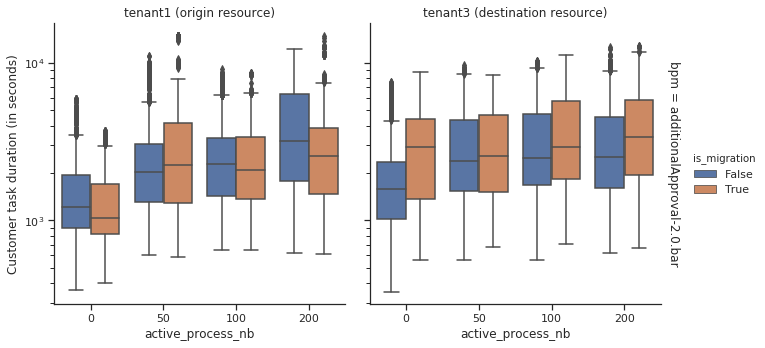

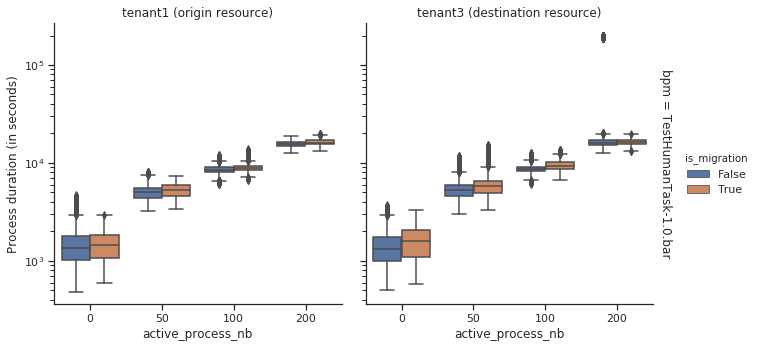

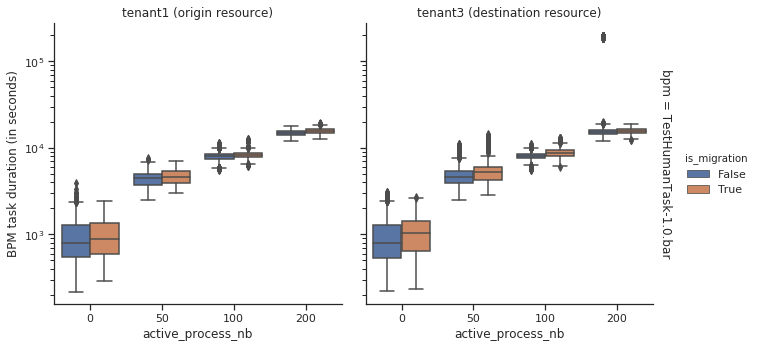

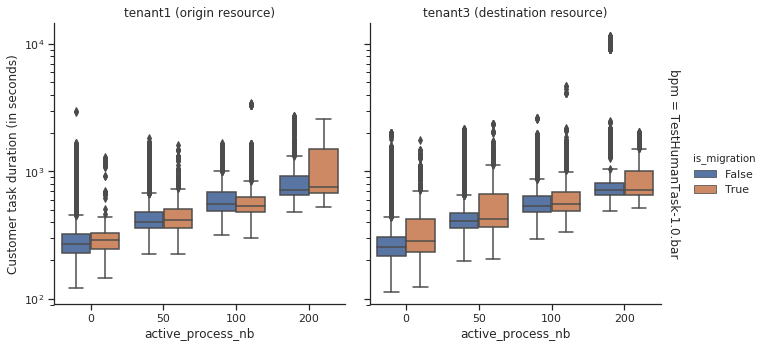

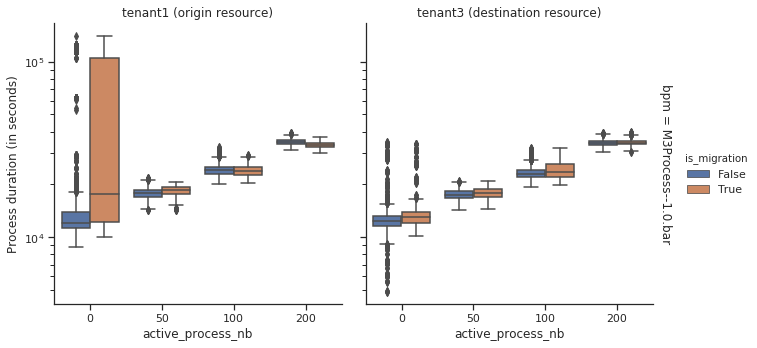

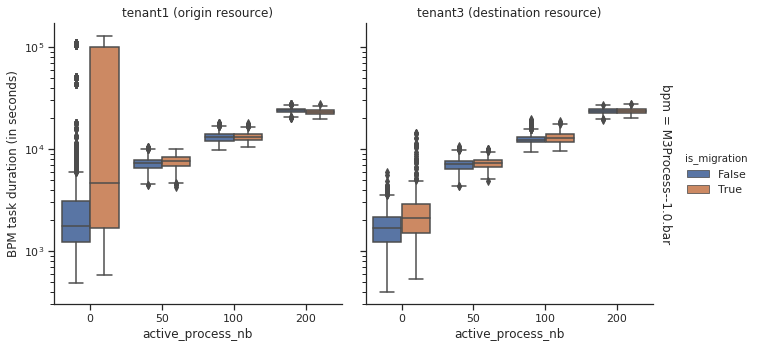

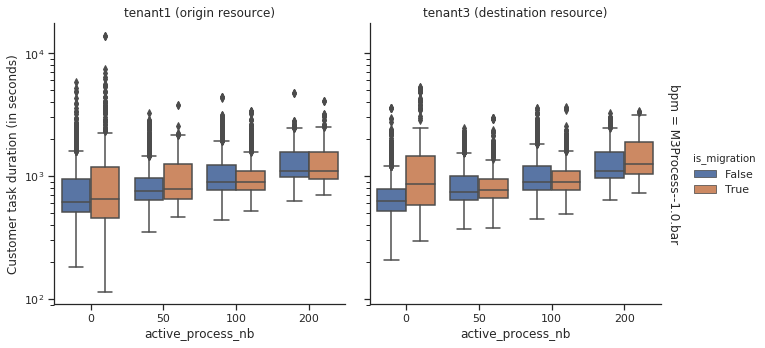

In [11]:
all_data_restricted = all_data_restrict[(all_data_restrict.duration< 200000) & (all_data_restrict.agentbpm_task_exec_restricted< 15000) &(all_data_restrict.nb.isin([25,50,100,200,0]))]
for bpm in all_data_restricted["bpm"].unique():
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="duration", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[2].set_ylabel("Process duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="bpms_task_exec", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("BPM task duration (in seconds)")
    #axes[2].set_ylabel("Duration (in seconds)")
    #xes[2].set_ylabel("Duration (in seconds)")
    #axes[4].set_xlabel("Number of active processes")
    #axes[5].set_xlabel("Number of active processes")
    g=sns.factorplot("active_process_nb", row="bpm",col="tenant", hue="is_migration", y="agentbpm_task_exec_restricted", data=all_data_restricted[all_data_restricted["bpm"] == bpm], kind="box", margin_titles=True)
    g.set(yscale="log")
    axes = g.axes.flatten()
    axes[0].set_title("tenant1 (origin resource)")
    axes[1].set_title("tenant3 (destination resource)")
    axes[0].set_ylabel("Customer task duration (in seconds)")

In [12]:
all_data_restricted.groupby(["bpm","tenant","is_migration"])["duration"].describe()

count          mean  \
bpm                        tenant  is_migration                          
M3Process--1.0.bar         tenant1 False         11745.0  24459.492720   
                                   True           4602.0  32070.492612   
                           tenant3 False         11351.0  22220.074531   
                                   True           3995.0  26415.586483   
TestHumanTask-1.0.bar      tenant1 False         17375.0   9854.419683   
                                   True           4107.0  10223.061115   
                           tenant3 False         18857.0   7592.704884   
                                   True           4667.0  10009.746518   
additionalApproval-2.0.bar tenant1 False         15131.0  79460.559447   
                                   True           5405.0  86249.120444   
                           tenant3 False         19530.0  86464.152125   
                                   True           8299.0  96680.085311   

                                                          std      min  \
bpm                        tenant  is_migration                          
M3Process--1.0.bar         tenant1 False         15191.027712   8811.0   
                                   True          26158.966205  10103.0   
                           tenant3 False          8483.893806   4914.0   
                                   True           8072.570777  10149.0   
TestHumanTask-1.0.bar      tenant1 False         21983.806181    507.0   
                                   True           5434.317442    577.0   
                           tenant3 False          5289.368957    487.0   
                                   True           5588.076471    598.0   
additionalApproval-2.0.bar tenant1 False         30585.116385  20623.0   
                                   True          31586.589011  20262.0   
                           tenant3 False         29900.142754  26185.0   
                                   True          32198.521697  30052.0   

                                                     25%      50%       75%  \
bpm                        tenant  is_migration                               
M3Process--1.0.bar         tenant1 False         16706.0  21768.0   33059.0   
                                   True          19284.0  25308.0   33704.0   
                           tenant3 False         15240.5  21328.0   32144.0   
                                   True          19121.0  26120.0   34308.0   
TestHumanTask-1.0.bar      tenant1 False          2227.5   6958.0    9808.5   
                                   True           5891.0   9682.0   15856.5   
                           tenant3 False          2938.0   6601.0   10475.0   
                                   True           5360.0   9004.0   15763.0   
additionalApproval-2.0.bar tenant1 False         59585.5  79039.0   93179.5   
                                   True          66657.0  84215.0  104790.0   
                           tenant3 False         65681.0  80696.5  107760.0   
                                   True          74336.5  87927.0  116473.5   

                                                      max  
bpm                        tenant  is_migration            
M3Process--1.0.bar         tenant1 False         140719.0  
                                   True          140719.0  
                           tenant3 False          39014.0  
                                   True           39668.0  
TestHumanTask-1.0.bar      tenant1 False         199974.0  
                                   True           19875.0  
                           tenant3 False          18782.0  
                                   True           19954.0  
additionalApproval-2.0.bar tenant1 False         199698.0  
                                   True          178213.0  
                           tenant3 False         180009.0  
                                   True          184357.0